# Regularized regression - to prevent overfitting!

Linear regression minimizes a loss function - it chooses coefficents for ech feature variable. Large coeficcients can lead to overfitting. Regularization - penalizing large coeficcients.

Linear regression:

$$y = a_1x_1 + a_2x_2 + ... + a_nx_n + b$$

#### Ridge Regression pros:

 * RR gives better generalization (test score) than Linear Regression if the dataset is small.

## Ridge Regression

In ridge regression, the coefficients ($a$) are chosen not only so that they predict well on the training data, but also to fit an additional constraint. We also want the **magnitude of coefficients to be as small as possible**; in other words, all entries of $a$ should be close to zero. Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well. This
constraint is an example of what is called regularization. Regularization means explicitly restricting a model to avoid overfitting. The particular kind used by ridge regression is known as L2 regularization.

Ridge regression addresses some of the problems of OLS by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares, 

$$\text{Loss function = OLS loss function} + \alpha \cdot \sum_{i=1}^n a_i^2$$

OLS : Ordinary Least Squares

Here, **$\alpha$** is a complexity parameter that controls the amount of shrinkage: the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

Alpha is the parameter we need to choose in order to predict.

A less complex model means worse performance on the training
set, but better generalization. As we are only interested in generalization perfor‐
mance, we should choose the Ridge model over the LinearRegression model.

In [5]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# use gapminder data
gapminder = pd.read_csv('data/gm_2008_region.csv', header=0)
gapminder.head(1)

population  fertility  HIV       CO2  BMI_male      GDP  BMI_female  life  \
0  34811059.0       2.73  0.1  3.328945   24.5962  12314.0    129.9049  75.3   

   child_mortality                      Region  
0             29.5  Middle East & North Africa

In [3]:
# data
X = gapminder.drop(['Region', 'life'], axis=1).values
y = gapminder.life.values.ravel()

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# regression object, train & predict
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

# score
print('R^2 = {:.3f}'.format(ridge.score(X_test, y_test)))

R^2 = 0.829


### Plotting R^2 values in range of different $\alpha$ values

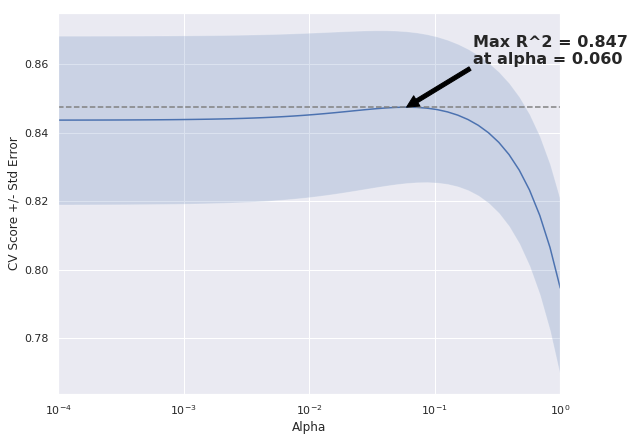

In [4]:
# lets define plotting function
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure(figsize=[9,7])
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    
    max_R = np.max(cv_scores)
    best_a = alpha_space[np.where(cv_scores == np.max(cv_scores))[0][0]]
    plt.annotate("Max R^2 = {:.3f}\nat alpha = {:.3f}".format(max_R, best_a), xy=(best_a, max_R),
                arrowprops={'color' : 'black'}, weight='bold', fontsize=16, xytext=(0.2, 0.86))
    plt.show()
    
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

sns.set()
    
# Display the plot
display_plot(ridge_scores, ridge_scores_std)

The Ridge model makes a trade-off between the simplicity of the model (near-zero coefficients) and its performance on the training set. How much importance the model places on simplicity versus training set performance can be specified by the user, using the alpha parameter.

Increasing alpha forces coefficients to move more toward zero, which decreases
training set performance but might help generalization.

## Lasso Regression

$$\text{Loss function = OLS loss function} + \alpha \cdot \sum_{i=1}^n |a_i|$$

The consequence of L1 regularization is that when using the lasso, some coefficients are exactly zero. This means some features are entirely ignored by the model. This can be seen as a form of automatic feature selection. Having some coefficients be exactly zero often makes a model easier to interpret, and can reveal the most important features of your model.

In [6]:
# data
X = gapminder.drop(['Region', 'life'], axis=1).values
y = gapminder.life.values.ravel()

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

print("R^2 = {:.3f}".format(lasso.score(X_test, y_test)))

R^2 = 0.866


### Lasso for feature selection

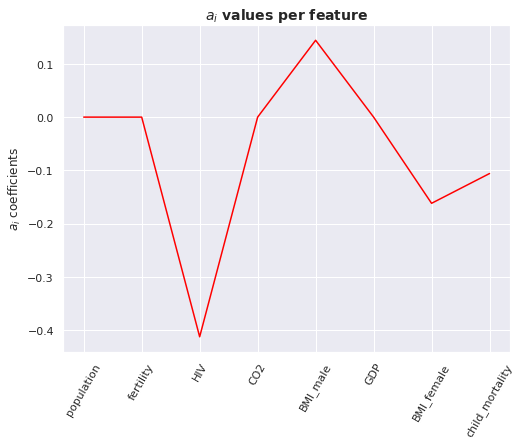

In [37]:
# select each feature
features = gapminder.drop(['Region', 'life'], axis=1).columns

# init lasso object
lasso = Lasso(alpha=0.1, normalize=True)

# calculate coefficients for each feature using all the data
lasso_coef = lasso.fit(X, y).coef_

# create the plot
plt.figure(figsize=(8, 6))
_ = plt.plot(range(len(features)), lasso_coef, c='red')
_ = plt.xticks(ticks=range(len(features)), labels=features, rotation=60)
_ = plt.ylabel(r'$a_i$ coefficients')
_ = plt.title(r'$a_i$ values per feature', fontsize=14, weight='bold')
plt.show()

Model elminates features where $a_i$ = 0. 

#### Determining useful features for different alpha values

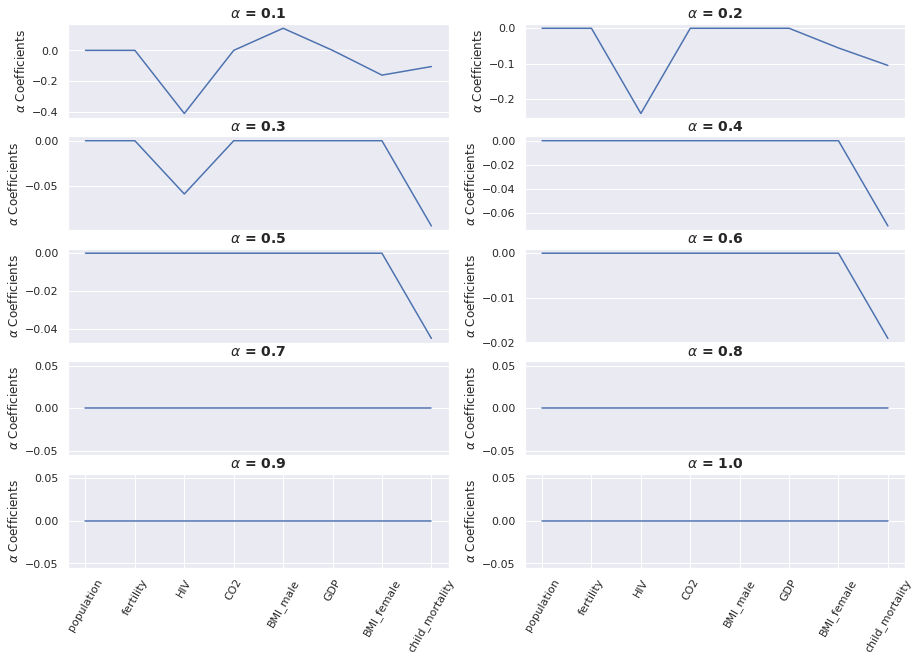

In [36]:
# select each feature
features = gapminder.drop(['Region', 'life'], axis=1).columns

alphas = np.arange(0.1, 1.1, 0.1)

plt.figure(figsize=(15, 10))
for i, a in enumerate(alphas):
    # init lasso object
    lasso = Lasso(alpha=a, normalize=True)

    # calculate coefficients for each feature using all teh data
    lasso_coef = lasso.fit(X, y).coef_

    # create the plot
    plt.subplot(5, 2, i+1)
    _ = plt.plot(range(len(features)), lasso_coef)
    _ = plt.ylabel(r'$\alpha$ Coefficients')
    _ = plt.title(r'$\alpha$ = {:.1f}'.format(a), fontsize=14, weight='bold')
    if i > 7:
        _ = plt.xticks(ticks=range(len(features)), labels=features, rotation=60)
    else:
        _ = plt.xticks([])
    
plt.show()